$$ % latex macros
% differential symbols in integrals
\newcommand\dVolume{\text{ dV}}
\newcommand\dArea{\text{ dA}}
\newcommand\dPoint{{\text{ d}\bs{x}}}

% miscellaneous operators
\newcommand\grad{\nabla}
\newcommand\divergence{{\grad \cdot}}
\newcommand{\wbigcup}{\mathop{\bigcup}\displaylimits}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
\newcommand\macaulay[1]{\left<#1\right>}
\newcommand\bs[1]{\boldsymbol{#1}}
\newcommand\abs[1]{\left\vert{#1}\right\vert}
\newcommand{\overbar}[1]{\mkern 1.5mu\overline{\mkern-1.5mu#1\mkern-1.5mu}\mkern 1.5mu}
\newcommand\exponential[1]{\exp\left(#1\right)}

% for elasticity
\newcommand\stress{\boldsymbol{\sigma}}
\newcommand\xstress{\widetilde{\stress}}
\newcommand\strain{\boldsymbol{\varepsilon}}
\newcommand\xnormal{\widetilde{\bs{n}}}
\newcommand\normal{\bs{n}}

% for fracture
\newcommand\crackset{\Gamma}
\newcommand\Gc{{\mathcal{G}_c}}
$$

# Strength surface of phase field models

## Deriviation

> See [Kumar et al 2020](https://doi.org/10.1016/j.jmps.2020.104027) JMPS and [Lorenzis and Maurini 2021](https://link.springer.com/10.1007/s10704-021-00555-6) IJF paper
>

The strain energy density with damage
$$
W_l(\strain, d, \grad d) = \varphi(\strain, d) + \Gc \gamma(d, \grad d).
$$

Stress and the damage energy release rate
$$
\stress(\strain, d) = \frac{\partial W_l(\strain, d, \grad d)}{\partial \strain}
= \frac{\partial \varphi(\strain, d)}{\partial \strain},
$$

$$
\mathcal{G}(\strain, d) = -\frac{W_l(\strain, d, \grad d)}{\partial d} = -\frac{\varphi(\strain, d)}{\partial d}
- \Gc \gamma'(d).
$$

The damage criterion $\mathcal{G}\ge 0$ implies
$$
-\frac{\partial \varphi(\strain, d)}{\partial d} \ge \Gc \gamma'(d),
$$

consider `AT-1` model, $\gamma(d) = 3/8 (d/l + l \grad d \cdot \grad d)$, and homogeneous
states for wich $\Delta d = 0$,
$$
-\frac{\partial \varphi(\strain, d)}{\partial d} \ge \frac{3\Gc}{8 l}.
$$

In Lorenzis's work, they introduced the complementary elastic energy density (defined
as the conjuate function of $\varphi$):
$$
\varphi^*(\stress, d) := \sup_{\hat{\strain}\in \mathrm{Sym}} \stress \cdot \hat{\strain} - \varphi(\hat{\strain}, d).
$$

So that the damage criterion in terms of stress becomes

\begin{equation}
\frac{\partial \varphi^*(\stress, d)}{\partial d} \ge \frac{3\Gc}{8 l}.
\end{equation}


## Isotropic model 

$$
\varphi(\strain, d)=g(d)\varphi_0(\strain),
$$
or equivalently
$$
\varphi^*(\stress, d)=\varphi^*_0(\stress)/g(d),
$$
with
$$
\varphi_0(\strain) = \kappa/2 \mathrm{tr}(\strain)^2 + \mu \norm{\strain_{dev}}^2,\\
\varphi_0^*(\stress) = \mathrm{tr}(\stress)^2/18\kappa + \norm{\stress_{dev}}^2/4\mu.
$$

Substitute it into Eq(1):
$$
-\varphi_0^*(\stress)g'(d)\ge 3\Gc/8l
$$

If we use the quadratic degradation function
$$
g'(d=d_c=0) = 2(d-1) = -2
$$
with $\sigma_{ts} = \sqrt{3/8 E/\Gc l}$,
$$
\frac{\mathrm{tr}(\stress)^2}{9\kappa} + \frac{\norm{\stress_{dev}}^2}{4\mu} - \frac{\sigma_{ts}^2}{E} \ge 0
$$

Using stress invariants $I_1 = \mathrm{tr}(\stress), J_2 = \norm{\stress_{dev}}^2/2$,
$$
\mathcal F(\stress) = \frac{I_1^2}{9\kappa} + \frac{J_2}{\mu} - \frac{\sigma_{ts}^2}{E} = 0,
$$
which is consistent with Kumar et al. (2020).

## Coheisve PFM with the spectral split

Damage criterion in terms of strain:
$$
-\varphi_+(\strain)g'(d)\ge 3\Gc/8l,
$$
where $\varphi_+(\strain)=\lambda \mathrm{tr}_+(\strain)^2 + \mu \strain_+ \cdot \strain_+$ and
$\strain_+ = \sum_i \langle\varepsilon_i\rangle_+ \bs{e}_i\otimes\bs{e}_i$

The strength surface is shown in Appendix A of Lorenzis and Maurini (2021).

Note that in Cohesive-PFM we use the rational degradation function
$$
g(d) = \frac{(1-d)^2}{(1-d)^2 + \frac{3\Gc}{8l\psi_c}(1+d)d},
$$
where $g'(0) = -\frac{3\Gc}{8l \psi_c}$, so that
$$
\varphi^+(\strain) \ge \psi_c \approx \frac{\sigma_{ts}^2}{2E},
$$
which is equivelent with ...



## Plots

Using the material properties of BegoStone in NPL paper

In [1]:
# settings
import sys
sys.path.append("../src")
import numpy as np
from strength.gen import StrengthSurface

# material properties (N, mm, MPa)
E = 2.735e4
nu = 0.2
Gc = 2.188e-2
sigma_ts = 20
K = np.round(E / 3 / (1 - 2 * nu), 2)
mu = np.round(E / 2 / (1 + nu), 2)
lbda = np.round(E * nu / (1 + nu) / (1 - 2 * nu), 2)

# strength surface setting
mname = 'bego'
stype = 'SPECTRAL'
srange = [-100, 50, 151]
props = [sigma_ts, lbda, mu, K, nu]

data_dir = f"../data/strength/ss_{mname}_{stype}_props{props}_srange{srange}.npy"

In [3]:
# surface gen
surface = StrengthSurface(stype, props, srange, data_dir)
surface.gen()

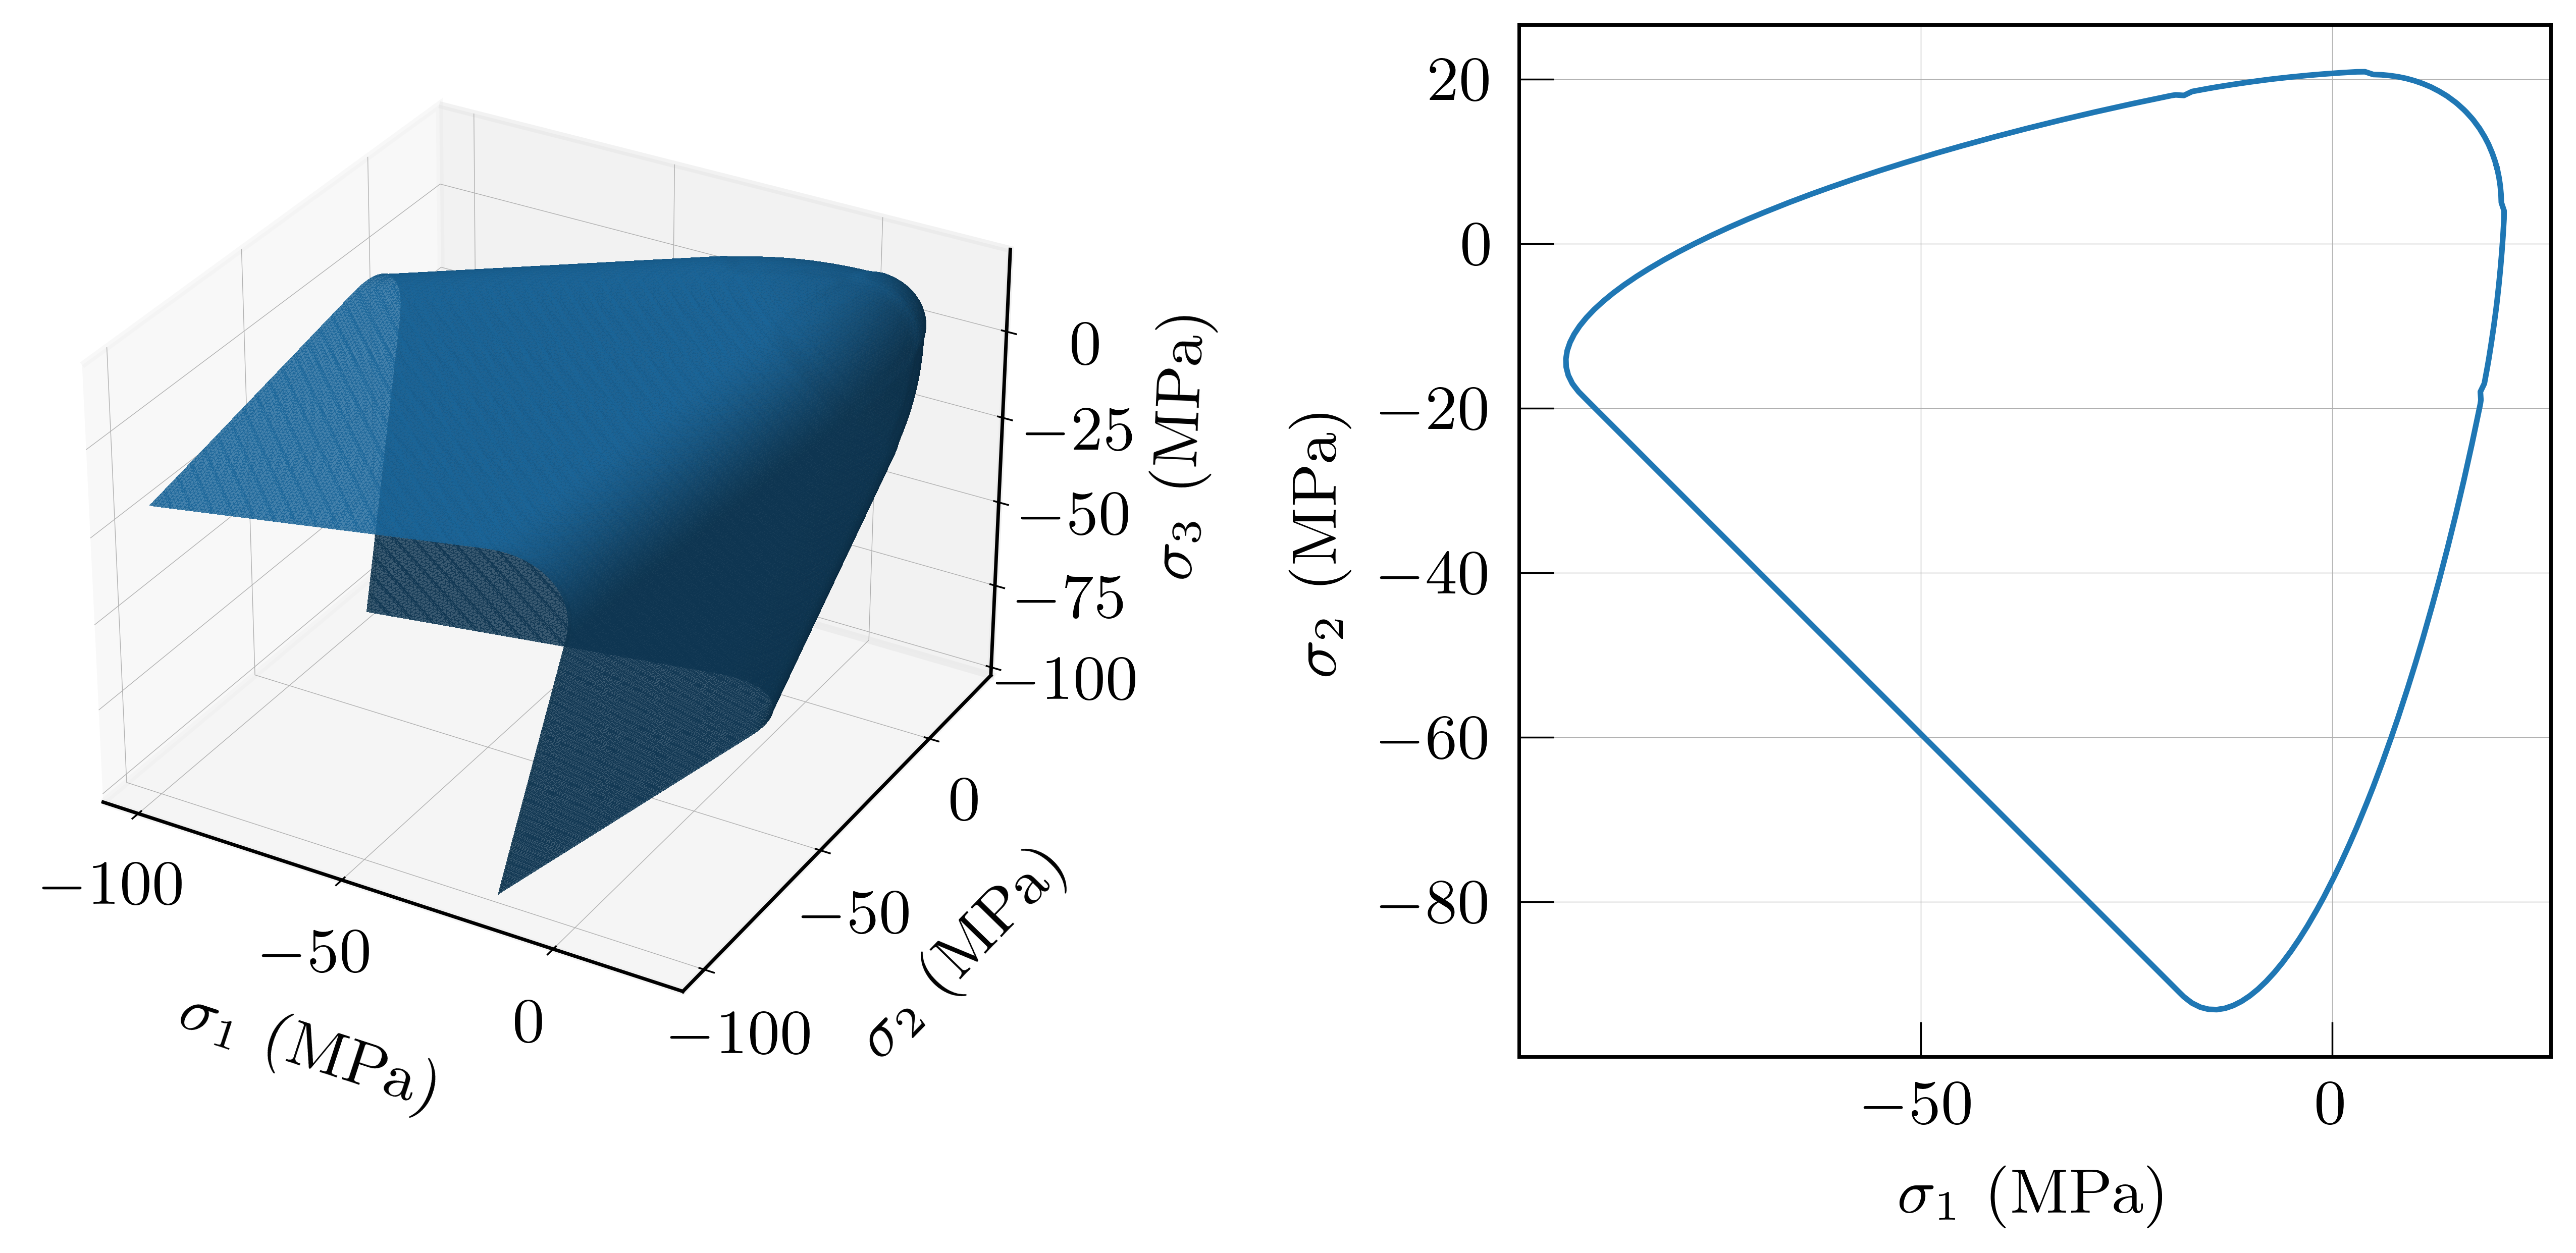

In [7]:
# plot
import sys
sys.path.append("../src")
from strength.plot import SurfacePlotter
import matplotlib.pyplot as plt

mname = 'bego'
stype = 'SPECTRAL'
srange = [-100, 50, 151]
props = [sigma_ts, lbda, mu, K, nu]

data_dir = f"../data/strength/ss_{mname}_{stype}_props{props}_srange{srange}.npy"
plotter = SurfacePlotter(data_dir)

plt.style.use("../misc/elsevier.mplstyle")
fig = plt.figure(figsize=(7, 2.655))

# 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
plotter.plot(dim=3, ax=ax1, save=False,
             linewidth=0, antialiased=False, alpha=0.8)
ax1.set_xlabel("$\sigma_{1}$ (MPa)", labelpad=-5)
ax1.set_ylabel("$\sigma_{2}$ (MPa)", labelpad=-5)
ax1.set_zlabel("$\sigma_{3}$ (MPa)", labelpad=-5)
ax1.tick_params(axis='x', pad=-3)
ax1.tick_params(axis='y', pad=-3)
ax1.tick_params(axis='z', pad=-1)

# 2D
ax2 = fig.add_subplot(1, 2, 2)
plotter.plot(dim=2, ax=ax2, save=False)
ax2.set_xlabel("$\sigma_{1}$ (MPa)")
ax2.set_ylabel("$\sigma_{2}$ (MPa)")
ax2.set_aspect('equal')